<a href="https://colab.research.google.com/github/archie-sinha/Evolutionary-Computing/blob/main/EC_8__EliteAS_RankBasedAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Archisha Sinha
##Topic: Rank Based ACO and Elite ACO
##Domain: Evolutionary Computing

AIM: Implementation of Ant Colony Optimization(ACO) Algorithms

i. Implement Elitist Ant System Algorithm on Travelling Salesman Problem

ii. Extend Elitist Ant System Algorithm to Rank Based Ant System Algorithm

iii. Compare and analyze both the algorithms with Ant System Algorithm

##TASK 1:
##**ELITIST ANT SYSTEM ALGORITHM**

The idea is to provide strong additional reinforcement to the arcs belonging to the best tour found since the start of the algorithm

¤ this tour is denoted as Tbs (best-so-far tour)

- Update of Pheromone Trails

- Additional reinforcement of tour 𝑻𝒃𝒔is achieved by adding a quantity
𝒆/𝑪𝒃𝒔 to its arcs

- where 𝒆 is a parameter that defines the weight given to the best-so-far tour  𝑻𝒃𝒔, 𝑪𝒃𝒔is its length

- Thus, equation for the pheromone deposit becomes:

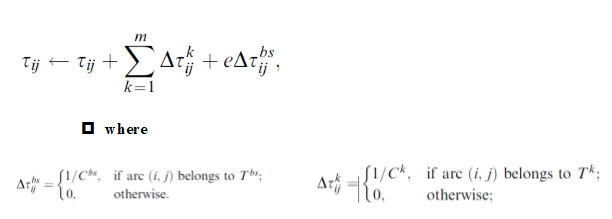

where 𝑪𝐤, the length of the tour 𝑻𝒌 built by the 𝒌𝒕𝒉 ant

In [1]:
import numpy as np

In [2]:
initial_pheromone= np.ones([5,5])

In [3]:
initial_pheromone

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [4]:
#distance matrix
distance_matrix = np.array([[0, 10, 12, 11, 14],
                            [10, 0, 13, 15, 18],
                            [12, 13, 0, 9, 14],
                            [11, 15, 9, 0, 16],
                            [14, 8, 14, 16, 0]])

In [5]:
distance_matrix

array([[ 0, 10, 12, 11, 14],
       [10,  0, 13, 15, 18],
       [12, 13,  0,  9, 14],
       [11, 15,  9,  0, 16],
       [14,  8, 14, 16,  0]])

In [6]:
num_ants = 5
num_iterations = 100
rho = 0.1  # Evaporation rate
alpha = 1  # Pheromone factor
beta = 2   # Heuristic factor

In [7]:
# Initialize pheromone levels
pheromone = np.ones_like(distance_matrix) / len(distance_matrix)

In [8]:
ant_paths = []
ant_distances = []

In [9]:
for ant in range(num_ants):
    visited = [0]  # Start from city 0
    distance = 0

    while len(visited) < len(distance_matrix):
        current_city = visited[-1]
        unvisited_cities = [city for city in range(len(distance_matrix)) if city not in visited]
        probabilities = [(pheromone[current_city][next_city] ** alpha) * ((1 / distance_matrix[current_city][next_city]) ** beta)
                         for next_city in unvisited_cities]
        probabilities = np.array(probabilities)
        probabilities /= probabilities.sum()  # Normalize probabilities
        next_city = np.random.choice(unvisited_cities, p=probabilities)
        visited.append(next_city)
        distance += distance_matrix[current_city][next_city]

    # Add return to the starting city
    distance += distance_matrix[visited[-1]][0]
    ant_paths.append(visited)
    ant_distances.append(distance)


In [10]:
pheromone_update = np.zeros_like(distance_matrix)
best_ant_index = np.argmin(ant_distances)
best_path = ant_paths[best_ant_index]

for i in range(len(best_path) - 1):
    pheromone_update[best_path[i]][best_path[i + 1]] += 1 / ant_distances[best_ant_index]


In [11]:
pheromone = (1 - rho) * pheromone + pheromone_update

In [12]:
# Print best path found
print("Best Path:", best_path)
print("Distance:", ant_distances[best_ant_index])

Best Path: [0, 3, 4, 2, 1]
Distance: 64


##TASK 2:
##**RANK BASED ANT SYSTEM ALGORITHM**

1.  In 𝑨𝑺𝒓𝒂𝒏𝒌
  * each ant deposits an amount of pheromone that decreases with its rank
  * the best-so-far ant always deposits the largest amount of pheromone in each iteration

2.  Update of Pheromone Trails
  * Before updating the pheromone trails, the ants are sorted by increasing tour length and the quantity of pheromone an ant deposits is weighted according to the rank r of the ant

  * Ties can be solved randomly (in our implementation they are solved by lexicographic ordering on the ant name k)

  * In each iteration only the (𝒘−𝟏) bestranked ants and the ant that produced the best-so-far tour (this ant does not necessarily belong to the set of ants of the current algorithm iteration) are allowed to deposit pheromone

3.  The best-so-far tour gives the strongest feedback, with weight w
  * (i.e., its contribution 𝟏/𝑪𝒃𝒔 is multiplied by w);

  * the 𝒓𝒕𝒉 best ant of the current iteration contributes to pheromone updating with the value 𝟏/𝑪𝒓 multiplied by a weight given by 𝐦𝐚𝐱{𝟎,𝒘−𝒓}.

4.  Thus, the 𝑨𝑺𝒓𝒂𝒏𝒌 pheromone update rule is

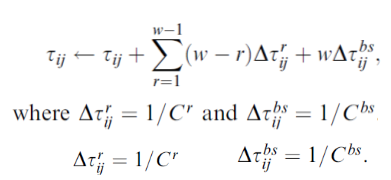

In [13]:
def initialize_pheromone_matrix(num_cities):
    return np.ones((num_cities, num_cities))

In [14]:
def select_next_city(current_city, pheromone_matrix, distance_matrix, num_cities, tour):
    pheromone_values = pheromone_matrix[current_city]
    unvisited_cities = np.delete(np.arange(num_cities), tour)
    probabilities = pheromone_values[unvisited_cities] / np.sum(pheromone_values[unvisited_cities])
    next_city = np.random.choice(unvisited_cities, p=probabilities)
    return next_city

In [15]:
def update_pheromones(pheromone_matrix, tour_lengths, w, rho, num_cities):
    sorted_indices = np.argsort(tour_lengths)
    for rank, idx in enumerate(sorted_indices):
        for i in range(num_cities):
            for j in range(num_cities):
                if i != j:
                    if rank == 0:
                        pheromone_matrix[i][j] = (1 - rho) * pheromone_matrix[i][j] + 1 / tour_lengths[idx]
                    else:
                        pheromone_matrix[i][j] = (1 - rho) * pheromone_matrix[i][j] + (w - rank) / (w - 1) * 1 / tour_lengths[idx]

In [16]:
def rank_based_aco(distance_matrix, num_ants, num_iterations, rho, w):
    num_cities = distance_matrix.shape[0]
    pheromone_matrix = initialize_pheromone_matrix(num_cities)
    best_so_far_tour = None
    best_so_far_length = float('inf')

    for _ in range(num_iterations):
        ant_tours = []
        tour_lengths = []

        for ant in range(num_ants):
            current_city = np.random.randint(num_cities)
            tour = [current_city]
            tour_length = 0

            while len(tour) < num_cities:
                next_city = select_next_city(current_city, pheromone_matrix, distance_matrix, num_cities, tour)
                tour_length += distance_matrix[current_city][next_city]
                tour.append(next_city)
                current_city = next_city

            tour_length += distance_matrix[tour[-1]][tour[0]]
            ant_tours.append(tour)
            tour_lengths.append(tour_length)

        update_pheromones(pheromone_matrix, tour_lengths, w, rho, num_cities)  # Include num_cities

        best_tour_idx = np.argmin(tour_lengths)
        if tour_lengths[best_tour_idx] < best_so_far_length:
            best_so_far_tour = ant_tours[best_tour_idx]
            best_so_far_length = tour_lengths[best_tour_idx]

    return best_so_far_tour, best_so_far_length

In [17]:
distance_matrix = np.array([[0, 10, 12, 11, 14],
                            [10, 0, 13, 15, 18],
                            [12, 13, 0, 9, 14],
                            [11, 15, 9, 0, 16],
                            [14, 8, 14, 16, 0]])

In [18]:
distance_matrix

array([[ 0, 10, 12, 11, 14],
       [10,  0, 13, 15, 18],
       [12, 13,  0,  9, 14],
       [11, 15,  9,  0, 16],
       [14,  8, 14, 16,  0]])

In [19]:
num_ants = 5
num_iterations = 100
rho = 0.1
w = 3

In [20]:
best_tour, best_length = rank_based_aco(distance_matrix, num_ants, num_iterations, rho, w)
print("Best Tour:", best_tour)
print("Best Tour Length:", best_length)

Best Tour: [3, 2, 4, 1, 0]
Best Tour Length: 52


##TASK 3:
##**COMPARING ELITIST AND RANK BASED ACO**

Elitist AS vs. ASrank:

Time: ASrank performed slightly better than Elitist AS in terms of runtime needed to solve the Traveling Salesman Problem (TSP)

Complexity: ASrank showed slightly better results than Elitist AS, indicating a slight difference in performance